
## An Overview of Scipy-Stats Python Library

Scipy-stats is the statistical functions subpackage of the SciPy library. The following are just some of its features :
1. ##### Probabilistic distributions- 
          This describes all the possible values and likelihoods that a random variable can take within a given range. Continous and discrete random variables have mostly the same basic methods between them
2. ##### Statistical operations -
        Summary and Frequency statistics Gives details of the random variable data e,g mean , median and mode or the frequency of this data - how many times a variable data appears.
3. ##### Statistical Tests-
        e.g T-tests - showing how significant the differences between data groups , measured in means
4. ##### Correlation Functions -
        statistical correlation between random variables. E.g One- Way ANOVA
5. ##### Kernel density estimation -
        This is an efficient tool for estimation of the probability density function using histograms as a tool for visualization. The gaussian_kde estimator can be used to estimate both univariate and multivariate data.
6. ##### Quasi- Monte Carlo functionality -
        Firstly Monte Carlo integration functionality is a class of algorithms that rely on pseudo-random numbers whereas Quasi Monte Carlo integration uses sub random sequences of numbers which has the advantage of a faster rate of convergence. These are popular in the world of mathematical and computational finance



### Correlation Function of Scipy- Stats in Python :

Aim: To use ANOVA for comparison between a categorical and numerical variables of a Diet Dataset
    
ANOVA stands for Analysis of Variance analysis. It uses F-tests to statistically test the equality of means. Named after Sir Ronald Fisher of the iris dataset fame.  

We are going to examine the dataset looking at 3 different diets and their effects on a group of 78 people. We want to see if there is a direct relationship between each of the diets and the calculated weight loss ( if any) of the 78 people.  

The variables looked at are Gender , Age , Height , Preweight , Diet and weight after 6 weeks , the weight loss calculated was also added to the csv file before importing it. The independent variable is diet

Dataset Reference : 

https://www.sheffield.ac.uk/mash/statistics/datasets

This data set contains information on 78 people using one of three diets:

| Variable Name   	| Variable                        	| Data Type 	|
|-----------------	|---------------------------------	|-----------	|
| People          	| Particular Number               	|           	|
| Gender          	| 1= Male, 0 = Female             	| Binary    	|
| Age             	| Age ( years)                    	| Scale     	|
| Height          	| Height(cm)                      	| Scale     	|
| Preweight       	| Weight before the diet (kg)     	| Scale     	|
| Diet            	| Diet                            	| Binary    	|
| Weight 6 weeks 	| Weight after 6 weeks (kg)      	| Scale     	|



### TASK OUTLINE : 

1. Analysis of diets. Download the dataset 

2. Import the diet data set with the function read.csv()

3. Define a new column weight loss = the difference between the initial and final weights

4. Display weight loss per diet type (column diet.type) by means of a boxplot.

5. Perform a Fisher's, Welch's and Kruskal-Wallis one-way ANOVA, respectively by means of the functions oneway.test() and kruskal.test

6. Display and analyze the results: Use the function summary() to display the results of an R object of class aov and the function print() otherwise.

7. Present your conclusions 

<img src="C:\Users\User\Desktop\repo\Machine-learning-and-Statistics\Scipy Stats\Guidelines for Anova testing.png"
width=400 height=400 />

Question : Which diet is best for losing weight ? /  Are there gender differences for weight lost ?


### Importing Libraries

In [1]:
# Data frames.
import pandas as pd

# Plotting.
import seaborn as sns

# Stats.
import scipy.stats as ss

# Numerical arrays.
import numpy as np

# Collections.
import collections as co

# Specials.
import scipy.special as spec
 
import pylab
import matplotlib.pyplot as plt
# For plotting 
import plotly as py
import plotly.graph_objects as go
from plotly.offline import iplot
import plotly.express as px

import statsmodels.api as sm
from statsmodels.formula.api import ols

### IMPORTING THE DATABASE

In [2]:
df = pd.read_csv(r'C:\Users\User\Desktop\repo\Machine-learning-and-Statistics\Scipy Stats\Diet_R.csv')
df

,Person,gender,Age,Height,pre.weight,Diet,weight6weeks,Weight loss
0,25,,41,171,60,2,60.0,0.0
1,26,,32,174,103,2,103.0,0.0
2,1,0,22,159,58,1,54.2,3.8
3,2,0,46,192,60,1,54.0,6.0
4,3,0,55,170,64,1,63.3,0.7
...,...,...,...,...,...,...,...,...
73,74,1,35,183,83,3,80.2,2.8
74,75,1,49,177,84,3,79.9,4.1
75,76,1,28,164,85,3,79.7,5.3
76,77,1,40,167,87,3,77.8,9.2


In [3]:
#observation size
df.shape[0]   # number of observations


78

In [4]:
df.groupby("Diet")['Weight loss'].describe()

,count,mean,std,min,25%,50%,75%,max
Diet,,,,,,,,
1,24.0,3.300000,2.240148,-0.6,1.975,3.05,3.95,9.0
2,27.0,3.025926,2.523367,-2.1,1.700,3.30,4.50,7.9
3,27.0,5.148148,2.395568,0.5,3.450,5.40,7.00,9.2


By grouping the diet and weight loss together and running the descibe() on it , we can see that diet 3 is the better diet to do as the mean weight is greater. The standard deviations are similar which can mean that the weight loss between each group is evenly spread out as well. 

## Formulate the hyptheses of the One-Way ANOVA of 'Diet' variable with the 'Weight loss" variable

H₀ (Null hypothesis) — that there is no difference among the 3 diet group means.
H₁ (Alternate hypothesis) — that at least one diet group mean differs significantly from the overall mean of the dependent variable.

### Assumption 1: Dependent variable
*************************************

A dependent variable should be measure at a continous interval level. 

In [5]:
# The dependent variable.
dependent = df['Weight loss']
dependent

0     0.0
1     0.0
2     3.8
3     6.0
4     0.7
     ... 
73    2.8
74    4.1
75    5.3
76    9.2
77    6.1
Name: Weight loss, Length: 78, dtype: float64

In [6]:
dependent.describe()

count    78.000000
mean      3.844872
std       2.551478
min      -2.100000
25%       2.000000
50%       3.600000
75%       5.550000
max       9.200000
Name: Weight loss, dtype: float64

### Assumption 2: Independent variable
*************************************
This should consist of 2 or more categorical independent groups/ 

In [7]:
# Independent variable.
independent1 = df['Diet']
independent1

0     2
1     2
2     1
3     1
4     1
     ..
73    3
74    3
75    3
76    3
77    3
Name: Diet, Length: 78, dtype: int64

### Assumption 3: Independence of Observations


*************************************************

There is no relationship between the observations in each group or between the groups themselves. So for example , each participant in the diet test , should only be on one of the diets. This assumption is true. This should be taken into account at the start or at the design phase before testing. 


### Assumption 4: Outliers
*************************************************

Reference #https://statisticsbyjim.com/basics/graph-groups-boxplots-individual-values/

We draw a box plot to show distributions by breaking down the data in to quartiles. The boxplot shows the quartiles of the dataset while the whiskers extend to show the rest of the distribution, then symbols are displayed for outliers that fall outside the whiskers.Outliers are the unusual values in a dataset and can have a negative effect on the ANOVA statistical analysis- leading to distortion of results or unsure findings
Boxplots is a good method if you have multiple distributions

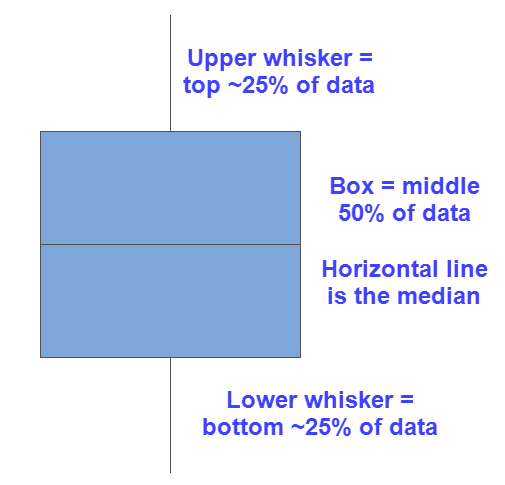! 

What does a boxplot tell us apart from the presence or not of outliers ?

- if a distribution is symmetrical  , the length of the box and whiskers on both sides of the median should be approx equal 
if not the data distribution is skewed

So looking at the box plot of out diet dataset variables  , we see that diet 1 and 2 have the same median but diet 2 has more variability . Diet 3 median value is greater than 1 and 2 and has more variability in weight loss. There is also the appearance of 2 outliers for diet 1. 

In [8]:
# https://seaborn.pydata.org/generated/seaborn.boxplot.html
sns.boxplot(x=independent, y=dependent, hue=independent2)

NameError: name 'independent' is not defined

Using the plotly express package in python , we created a boxplot with go.Box from the plotly.graph objects.Its just another way of illustrating the variables

reference : https://plotly.com/python/box-plots/

In [ ]:
fig = go.Figure()

fig.add_trace(go.Box(y=df.Age.values, name = "Age"))
fig.add_trace(go.Box(y=df.Height.values, name = "Height"))
fig.add_trace(go.Box(y=df["pre.weight"].values, name = "Start weight"))
fig.add_trace(go.Box(y=df["Weight loss"].values, name = "Finish weight"))

fig.show()

In [ ]:
_ = df.boxplot('Weight loss', by='Diet')

### Assumption 5: Normality
*******************************************

reference : https://towardsdatascience.com/6-ways-to-test-for-a-normal-distribution-which-one-to-use-9dcf47d8fa93



Anova assumes that each samples was drawn from a normally distributed population. To check this assumption we look at 2 approaches : 

1. Visually using histograms or Q-Q plots





2. Formal statisticals test : Shapiro-Wilk 

This is the most powerful test when testing for a normal distribution. Developed specifically for the normal distribution. 
Normal distribution is assumed if the P-value >0.05  


In [ ]:
# KDEs of the three categories.
sns.displot(x=dependent, hue=independent1, kind="kde")

In [ ]:
# Extract the weight losses for diet 1.
Weightloss_1 = dependent[independent1 == 1]
Weightloss_1

In [ ]:
Weightloss_f = dependent[independent2 == 0]
Weightloss_f

In [ ]:
# Extract the weight losses for diet 1.
Weightloss_2 = dependent[independent1 == 2]
Weightloss_2

In [ ]:
# Extract the weight losses for diet 1.
Weightloss_3 = dependent[independent1 == 3]
Weightloss_3

In [ ]:
# Run the Shapiro-Wilk test.
ss.shapiro(dependent[independent1 == 1])

In [ ]:
ss.shapiro(dependent[independent1 == 2])

In [ ]:
# Run the test for the virginica.
ss.shapiro(dependent[independent1 == 3])

### Assumption 6: Homogeneity of Variances
**************************************************

reference :https://www.statisticssolutions.com/the-assumption-of-homogeneity-of-variance/

This is the assumption that all comparison groups have the same variance. If they dont , as long as the group sizes are equal , anova can go ahead a utilize F statistics without the fear of violation of this assumption. If the group sizes are not equal and homogeneity is violated then the F statistic is deemed biased. Large sample variances are associated with small groups sizes , causing the significance level to be underestimated and the null hypothesis to be rejected in error.However if large sample variances are associated with large group sizes , then this leads to overestimated significance level and may in turn lead to reducing the power of the test. 
There are several tests that can be used to test this assumption : Levene;s test . It assesses if the groups have equal variances by using F-test. A p value less than 0.05 indicates a violation of the assumption 

In [ ]:
# Test for equal variances.
ss.levene(
    dependent[independent == 1],
    dependent[independent == 2],
    dependent[independent == 3]
)

The result is greater than 0.05 , therefore equal variances can be assumed and the anova results are valid

### One-way ANOVA

*****************************************************************************************************

In [ ]:
# ANOVA.
ss.f_oneway(
    dependent[independent1 == 1],
    dependent[independent1 == 2],
    dependent[independent1 == 3]
)

In [ ]:
ss.kruskal(
    dependent[independent1 == 1],
    dependent[independent1 == 2],
    dependent[independent1 == 3]
)

In [9]:

https://ariepratama.github.io/How-to-Use-1-Way-Anova-in-Python/

SyntaxError: invalid syntax (<ipython-input-9-7fcf909ca81b>, line 3)

the following rules to determine if the categorical variable has any influence on the numerical variable:
if p < 0.05, this means that the categorical variable has significant influence on the numerical variable
if p > 0.05, this means that the categorical variable has no significant influence on the numerical variable

In [ ]:
df.groupby("Diet")['gender', 'Weight loss'].describe()

### Plot the interaction plot between the two variables and comment on the extent of interaction between the two categorical variables.¶

In [ ]:
f, ax = plt.subplots(figsize=(11,9))
plt.title('Weight Distributions Between Sample')
plt.ylabel('pdf')
sns.distplot(df.Weight loss) 

In [ ]:
sns.catplot(x='Diet', y='Weight loss', data=df, hue='gender');

In [ ]:
f, ax = plt.subplots(figsize=(11,9))
sns.distplot(df[df.gender == '1'].weight6weeks, ax=ax, label='Male')
sns.distplot(df[df.gender == '0'].weight6weeks, ax=ax, label='Female')
plt.title('Weight Distribution for Each Gender')
plt.legend()

In [ ]:
df.groupby(['gender', 'Diet']).agg(
    [np.mean, np.median, np.count_nonzero, np.std]
).weight6weeks

### Two-way ANOVA

reference : https://www.statisticshowto.com/probability-and-statistics/hypothesis-testing/anova/#TwoWay
***************************************************************

To look at the interaction between weight loss and gender for each diet. The weight loss is the outcome or the variable that can be measuered , gender and diet are the two catergorical variables. These are also the independent variables , known as factors in a two way ANOVA. The factor diet is split into 3 types and gender is split into 2, male and female. 
Results from a 2 way ANOVA calculates the main effect and the interaction effect. 
There are 2 null hypotheses : 
H1 - The weight loss mean for each of the 3 diets are equal 
H2 - the weight loss mean for both genders are equal

Assumptions for the 2- way ANOVA 
The population must be close to a normal distribution.
Samples must be independent.
Population variances must be equal (i.e. homoscedastic).
Groups must have equal sample sizes.
